In [50]:
import pandas as pd
import numpy as np
import scipy as scp 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [51]:
BaseballStats = pd.read_csv('baseball.csv')

In [52]:
BaseballStats.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [53]:
len(BaseballStats)

1232

In [54]:
len(BaseballStats.columns)

15

In [55]:
MLB_Teams = pd.read_csv('mlb_teams.csv')

In [56]:
MLB_Teams.head()

,TeamName,Playoffs,RA/G,DefEff,E,DP,W,L,W-L%,ERA,...,RBI,SB,SO 1,BA,OBP,SLG,GDP,LOB,salary,WAR
0,2018 ARI,0,3.98,0.698,75,152,82,80,0.506,3.72,...,658,79,1460,0.235,0.310,0.397,110,1086,143324597,34.1
1,2018 ATL,1,4.06,0.709,80,134,90,72,0.556,3.75,...,717,90,1290,0.257,0.324,0.417,99,1143,130649395,40.8
2,2018 BAL,0,5.51,0.674,104,159,47,115,0.290,5.18,...,593,81,1412,0.239,0.298,0.391,132,1027,127633703,11.4
3,2018 BOS,1,3.99,0.693,77,106,108,54,0.667,3.75,...,829,125,1253,0.268,0.339,0.453,130,1124,227398860,56.5
4,2018 CHC,1,3.96,0.700,104,155,95,68,0.583,3.65,...,722,66,1388,0.258,0.333,0.410,107,1224,194259933,45.0


In [57]:
len(MLB_Teams)

210

In [58]:
len(MLB_Teams.columns)

29

In [59]:
MLBTeams = MLB_Teams['TeamName'].str.split(' ', expand=True)

In [60]:
MLBTeams.head()

,0,1
0,2018,ARI
1,2018,ATL
2,2018,BAL
3,2018,BOS
4,2018,CHC


In [61]:
MLBTeams = pd.concat([MLB_Teams, MLBTeams], axis=1).drop('TeamName', axis=1).rename(columns={0: "Year", 1: "Team"})

In [62]:
MLBTeams.head()

,Playoffs,RA/G,DefEff,E,DP,W,L,W-L%,ERA,tSho,...,SO 1,BA,OBP,SLG,GDP,LOB,salary,WAR,Year,Team
0,0,3.98,0.698,75,152,82,80,0.506,3.72,9,...,1460,0.235,0.310,0.397,110,1086,143324597,34.1,2018,ARI
1,1,4.06,0.709,80,134,90,72,0.556,3.75,11,...,1290,0.257,0.324,0.417,99,1143,130649395,40.8,2018,ATL
2,0,5.51,0.674,104,159,47,115,0.290,5.18,7,...,1412,0.239,0.298,0.391,132,1027,127633703,11.4,2018,BAL
3,1,3.99,0.693,77,106,108,54,0.667,3.75,14,...,1253,0.268,0.339,0.453,130,1124,227398860,56.5,2018,BOS
4,1,3.96,0.700,104,155,95,68,0.583,3.65,18,...,1388,0.258,0.333,0.410,107,1224,194259933,45.0,2018,CHC


In [63]:
TeamCorr = MLBTeams.corr()

In [64]:
MLBTeams.corr()

,Playoffs,RA/G,DefEff,E,DP,W,L,W-L%,ERA,tSho,...,RBI,SB,SO 1,BA,OBP,SLG,GDP,LOB,salary,WAR
Playoffs,1.000000,-0.531019,0.338282,-0.166259,-0.167126,0.762605,-0.760587,0.761472,-0.527045,0.326596,...,0.524152,-0.072958,-0.082424,0.348386,0.544912,0.433453,0.024129,0.354714,0.278408,0.734783
RA/G,-0.531019,1.000000,-0.597561,0.250231,0.324652,-0.755768,0.755377,-0.756014,0.988958,-0.625441,...,-0.022674,-0.002917,0.227499,-0.012428,-0.178377,0.087559,0.005508,-0.299914,-0.136933,-0.719922
DefEff,0.338282,-0.597561,1.000000,-0.354127,-0.310951,0.492102,-0.492720,0.492832,-0.572578,0.372025,...,0.090619,0.020947,-0.105448,-0.074912,0.106321,-0.001236,-0.042666,0.090200,0.065293,0.494814
E,-0.166259,0.250231,-0.354127,1.000000,0.181845,-0.283221,0.283740,-0.283464,0.166816,-0.103943,...,-0.174217,0.175303,0.217711,-0.153199,-0.165264,-0.147268,-0.152673,-0.083989,-0.293285,-0.304925
DP,-0.167126,0.324652,-0.310951,0.181845,1.000000,-0.239046,0.240543,-0.240172,0.317695,-0.201999,...,-0.035386,-0.022105,0.051345,0.099053,-0.069786,0.003700,0.111315,-0.178156,-0.156743,-0.242598
W,0.762605,-0.755768,0.492102,-0.283221,-0.239046,1.000000,-0.999715,0.999909,-0.742127,0.481857,...,0.565225,-0.035061,-0.172904,0.386443,0.593959,0.456192,0.064419,0.320284,0.356816,0.913782
L,-0.760587,0.755377,-0.492720,0.283740,0.240543,-0.999715,1.000000,-0.999928,0.741818,-0.481790,...,-0.564723,0.037201,0.174414,-0.388525,-0.595841,-0.455657,-0.067319,-0.321915,-0.356091,-0.913299
W-L%,0.761472,-0.756014,0.492832,-0.283464,-0.240172,0.999909,-0.999928,1.000000,-0.742399,0.482205,...,0.564690,-0.035845,-0.173372,0.387046,0.594521,0.455628,0.065479,0.320745,0.356310,0.913693
ERA,-0.527045,0.988958,-0.572578,0.166816,0.317695,-0.742127,0.741818,-0.742399,1.000000,-0.612624,...,-0.004672,-0.024873,0.193596,0.012923,-0.168352,0.113617,0.010154,-0.321953,-0.113487,-0.699768
tSho,0.326596,-0.625441,0.372025,-0.103943,-0.201999,0.481857,-0.481790,0.482205,-0.612624,1.000000,...,-0.059697,-0.030882,-0.156143,-0.004344,0.142630,-0.135599,0.051987,0.290383,0.077943,0.436458


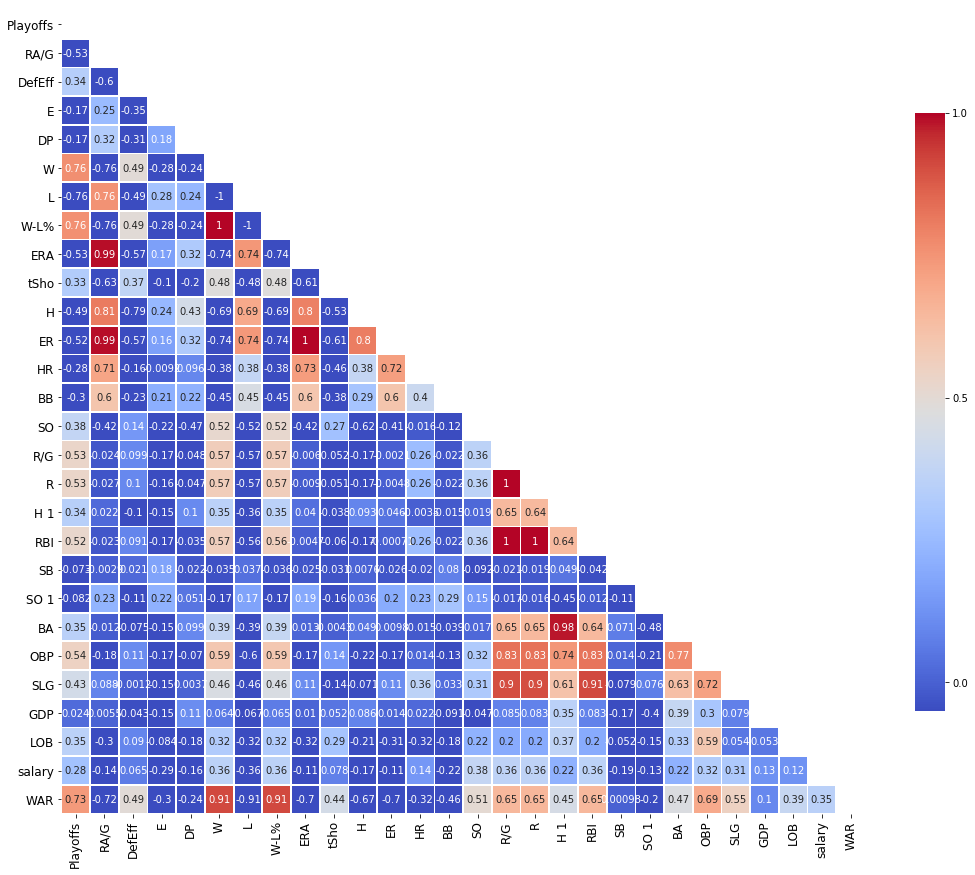

In [65]:
TeamCorr = MLBTeams.corr()

mask = np.zeros_like(TeamCorr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(18, 22))

heatmap = sns.heatmap(TeamCorr, 
                      mask = mask,
                      square = True,
                      linewidths = .75,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .5,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -.05,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

ax.set_yticklabels(TeamCorr.columns, rotation = 0, fontsize = 12)
ax.set_xticklabels(TeamCorr.columns, fontsize = 12)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})